# Final Project Submission

* **Student name**: Sara Robinson
* **Student pace**: *self paced*/part time/full time
* **Scheduled project review date/time**: Tuesday 2/9/2021 10:30 AM
* **Instructor name**: Jeff Herman
* **Blog post URL**: https://srobz.github.io/module_2_project
* **Notebook**: *3*/3

## Introduction
This is the third notebook for the Module 2 Final Project. It is picking up at Modeling the data and Model Validation.

## Import Libraries
In the following cells I again import the relevant libraries.

### Import Data Cleaning and Visualization Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import Statistics Libraries

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Data
In the previous notebook, we explored the data and made an updated dataframe ready to be modeled. In the following cell we will load this dataset into the notebook then move on to model it.

In [3]:
df = pd.read_csv('UpdatedEDA.csv') #Creating dataframe for data set
df.head() #Pulling up first 5 rows to inspect

,Unnamed: 0,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,221900.0,3,1.00,0.0,3,7,47.5112,-122.257,0,0,0,0,0,0
1,1,538000.0,3,2.25,0.0,3,7,47.7210,-122.319,1,0,1,0,0,0
2,2,180000.0,2,1.00,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,3,604000.0,4,3.00,0.0,5,7,47.5208,-122.393,1,0,0,0,0,0
4,4,510000.0,3,2.00,0.0,3,8,47.6168,-122.045,0,0,0,0,0,0


Before we go further, I am going to remove the oclumn **Unnamed:0** as it was added when I saved the previous dataframe.

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1) #Dropping unnamed column
df.head() #Checking to see that the column was dropped

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,0.0,3,7,47.5112,-122.257,0,0,0,0,0,0
1,538000.0,3,2.25,0.0,3,7,47.7210,-122.319,1,0,1,0,0,0
2,180000.0,2,1.00,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,4,3.00,0.0,5,7,47.5208,-122.393,1,0,0,0,0,0
4,510000.0,3,2.00,0.0,3,8,47.6168,-122.045,0,0,0,0,0,0


We also need to change the names of the dummy variables in order to remove the "." from the column names.

In [5]:
subs = [('.', '_')] #Replacing . with _
def col_formatting(col): #Defining function
    for old, new in subs: #Creating for loop within function
        col = col.replace(old, new) #Making sure it replaces
    return col #Telling function what to return

df.columns = [col_formatting(col) for col in df.columns] #Updating this to use function

In [6]:
list(df.columns) #Checking to make sure column names were changed

['price',
 'bedrooms',
 'bathrooms',
 'view',
 'condition',
 'grade',
 'lat',
 'long',
 'basement',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5']

# Modeling
First I'll run a train-test split, then I'll make an initial model.

In [7]:
outcome = 'price' #Setting outcome to price
x_cols = list(df.columns) #Setting x_cols to columns in dataframe
x_cols.remove(outcome) #Removing price from x_cols

In [8]:
train, test = train_test_split(df) #Setting the split

print(len(train), len(test)) #Printing the length of the train and test sets
train.head() #Printing the first 5 rows of train

14744 4915


,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
9063,210000.0,3,1.0,0.0,3,6,47.5015,-122.349,0,0,0,0,0,0
4067,950000.0,4,3.0,0.0,2,10,47.7154,-122.161,1,0,1,0,0,0
11565,252000.0,3,1.5,0.0,4,7,47.3639,-122.048,0,0,0,0,0,0
9520,400000.0,5,2.5,0.0,4,7,47.5422,-122.359,1,1,0,0,0,0
5002,540000.0,4,2.5,0.0,3,9,47.7366,-122.204,0,0,1,0,0,0


In [9]:
test.head() #Printing the first 5 rows of test

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5
19419,403000.0,2,1.0,0.0,3,7,47.6911,-122.313,0,0,1,0,0,0
459,280000.0,3,1.5,0.0,4,7,47.4404,-122.191,0,0,0,0,0,0
9465,350000.0,3,1.0,0.0,4,7,47.7622,-122.163,0,0,0,0,0,0
11406,840500.0,3,2.0,0.0,4,8,47.6365,-122.361,1,1,0,0,0,0
8177,340000.0,3,2.5,0.0,3,7,47.4387,-122.114,0,0,1,0,0,0


In [10]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #setting the formula
model = ols(formula = formula, data = train).fit() #Setting the model
model.summary() #Printing the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1808.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:12:30   Log-Likelihood:            -1.9341e+05
No. Observations:               14744   AIC:                         3.869e+05
Df Residuals:                   14730   BIC:                         3.870e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.356e+07   9.95e+05    -23.675      0.000   -2.55e+07   -2.16e+07
bedrooms    1.224e+04   1458.050      8.393      0.000    9379.641    1.51e+04
bathrooms   2.663e+04   2353.888     11.311      0.000     2.2e+04    3.12e+04
view         4.65e+04   1625.275     28.613      0.000    4.33e+04    4.97e+04
condition   3.996e+04   1627.692     24.553      0.000    3.68e+04    4.32e+04
grade       9.724e+04   1329.952     73.116      0.000    9.46e+04    9.98e+04
lat         5.643e+05   7263.121     77.688      0.000     5.5e+05    5.78e+05
long        3.103e+04   7857.438      3.949      0.000    1.56e+04    4.64e+04
basement    2.555e+04   2438.372     10.479      0.000    2.08e+04    3.03e+04
floors_1_5  7.254e+04   3701.385     19.598      0.000    6.53e+04    7.98e+04
floors_2_0  1.846e+04   3001.078      6.151      0.000    1.26e+04    2.43e+04
floors_2_5  6.527e+04   1.43e+04      4.557      0.000    3.72e+04    9.33e+04
floors_3_0 -3.627e+04   6812.817     -5.324      0.000   -4.96e+04   -2.29e+04
floors_3_5  -6.11e+04   6.97e+04     -0.877      0.381   -1.98e+05    7.55e+04
==============================================================================
Omnibus:                     1123.606   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1562.735
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       3.938   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results Interpreted**:
* R-squared is 0.615, Skew is 0.645, and Kurtosis is 3.938. Skew and Kurtosis could be a little smaller but our R-squared is already looking good.

Let's move onto our first model.

## Model 1
For the first model, let's look at p-values and remove those that are insignificant (> 0.05).

In [11]:
summary = model.summary() #Setting model summary
p_table = summary.tables[1] #Setting ptable
p_table = pd.DataFrame(p_table.data) #Putting info from model into table
p_table.columns = p_table.iloc[0] #Locating columns
p_table = p_table.drop(0) #Dropping from table
p_table = p_table.set_index(p_table.columns[0]) #Setting table index
p_table['P>|t|'] = p_table['P>|t|'].astype(float) #Setting P-value column
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index) #Finding p-values less than 0.05
x_cols.remove('Intercept') #Removing column we don't need
print(len(p_table), len(x_cols)) #Printing length of ptable and x columns
print(x_cols) #Printing the columns

14 12
['bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'lat', 'long', 'basement', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0']


Now let's run the model with just these features.

In [12]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1959.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:13:44   Log-Likelihood:            -1.9341e+05
No. Observations:               14744   AIC:                         3.869e+05
Df Residuals:                   14731   BIC:                         3.869e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.355e+07   9.95e+05    -23.662      0.000   -2.55e+07   -2.16e+07
bedrooms    1.226e+04   1457.773      8.411      0.000    9404.591    1.51e+04
bathrooms   2.655e+04   2352.282     11.287      0.000    2.19e+04    3.12e+04
view        4.649e+04   1625.187     28.606      0.000    4.33e+04    4.97e+04
condition   3.998e+04   1627.562     24.565      0.000    3.68e+04    4.32e+04
grade       9.724e+04   1329.927     73.113      0.000    9.46e+04    9.98e+04
lat         5.642e+05   7262.795     77.684      0.000     5.5e+05    5.78e+05
long        3.115e+04   7856.238      3.965      0.000    1.57e+04    4.65e+04
basement    2.562e+04   2437.212     10.511      0.000    2.08e+04    3.04e+04
floors_1_5  7.257e+04   3701.213     19.607      0.000    6.53e+04    7.98e+04
floors_2_0  1.855e+04   2999.124      6.186      0.000    1.27e+04    2.44e+04
floors_2_5  6.536e+04   1.43e+04      4.564      0.000    3.73e+04    9.34e+04
floors_3_0 -3.614e+04   6810.992     -5.305      0.000   -4.95e+04   -2.28e+04
==============================================================================
Omnibus:                     1123.913   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1563.305
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       3.938   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results Interpreted**:
* R-squared, skew, and kurtosis stayed the same.
* Multicollinearity is indicated.

Let's move onto our second model.

## Model 2
Since multicollinearity is indicated, I want to look at the variance inflation factor. I am going to remove the features with the highest VIFs and see how that effects the model.

In [13]:
X = df[x_cols] #Setting X to x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #Creating the variance inflation factors
list(zip(x_cols, vif)) #Printing a list of the feature and their VIF score

[('bedrooms', 24.26099956063732),
 ('bathrooms', 24.430858217455),
 ('view', 1.1133508338676021),
 ('condition', 32.35565529126715),
 ('grade', 101.54965705048083),
 ('lat', 112063.42715221587),
 ('long', 111352.702309235),
 ('basement', 2.0089071145949653),
 ('floors_1_5', 1.2094027436816954),
 ('floors_2_0', 3.25410011067198),
 ('floors_2_5', 1.0289738976505227),
 ('floors_3_0', 1.206396921336976)]

It looks like both lat and long have significantly larger VIFs than the rest of the features, so I will remove both of those and run the model. 

In [14]:
vif_scores = list(zip(x_cols, vif)) #Making the vif scores into a list with their feature
x_cols = [x for x, vif in vif_scores if vif < 1000] #removing the features with an overly high vif
print(len(vif_scores), len(x_cols)) #Printing number we have left

12 10


In [15]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:15:13   Log-Likelihood:            -1.9595e+05
No. Observations:               14744   AIC:                         3.919e+05
Df Residuals:                   14733   BIC:                         3.920e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.913e+05   1.24e+04    -47.659      0.000   -6.16e+05   -5.67e+05
bedrooms    5390.2501   1725.207      3.124      0.002    2008.628    8771.872
bathrooms   1.524e+04   2749.629      5.542      0.000    9849.673    2.06e+04
view        3.799e+04   1919.881     19.787      0.000    3.42e+04    4.18e+04
condition   3.678e+04   1930.879     19.047      0.000     3.3e+04    4.06e+04
grade       1.123e+05   1558.213     72.062      0.000    1.09e+05    1.15e+05
basement    5.244e+04   2764.957     18.967      0.000     4.7e+04    5.79e+04
floors_1_5  9.676e+04   4350.123     22.243      0.000    8.82e+04    1.05e+05
floors_2_0  1.657e+04   3560.641      4.653      0.000    9588.792    2.35e+04
floors_2_5   6.35e+04    1.7e+04      3.735      0.000    3.02e+04    9.68e+04
floors_3_0  2.196e+04   7877.370      2.788      0.005    6519.514    3.74e+04
==============================================================================
Omnibus:                      467.652   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.150
Skew:                           0.446   Prob(JB):                    3.72e-112
Kurtosis:                       3.202   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results Interpreted**:
* The R-squared went down to 0.457, but Skew went down to 0.446 and Kurtosis to 3.202, meaning it is a much more normal distribution than the previous model.
* There is no longer an indication of multicollinearity.
Let's move onto our third model.

## Model 3
In this model I will use the p-value table again but this time removing any features that have a p-value less than 0.01.

In [17]:
summary = model.summary() #Setting model summary
ptable1 = summary.tables[1] #Setting ptable
ptable1 = pd.DataFrame(ptable1.data) #Putting info from model into table
ptable1.columns = ptable1.iloc[0] #Locating columns
ptable1 = ptable1.drop(0) #Dropping from table
ptable1 = ptable1.set_index(ptable1.columns[0]) #Setting table index
ptable1['P>|t|'] = ptable1['P>|t|'].astype(float) #Setting P-value column
x_cols = list(ptable1[ptable1['P>|t|'] < 0.005].index) #Finding p-values less than 0.05
x_cols.remove('Intercept') #Removing column we don't need
print(len(ptable1), len(x_cols)) #Printing length of ptable and x columns
print(x_cols) #Printing the columns

11 9
['bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'basement', 'floors_1_5', 'floors_2_0', 'floors_2_5']


In [18]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = train).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1375.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:16:29   Log-Likelihood:            -1.9595e+05
No. Observations:               14744   AIC:                         3.919e+05
Df Residuals:                   14734   BIC:                         3.920e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.911e+05   1.24e+04    -47.633      0.000   -6.15e+05   -5.67e+05
bedrooms    4697.1164   1707.589      2.751      0.006    1350.028    8044.204
bathrooms   1.703e+04   2674.134      6.369      0.000    1.18e+04    2.23e+04
view        3.786e+04   1919.787     19.722      0.000    3.41e+04    4.16e+04
condition   3.615e+04   1918.275     18.846      0.000    3.24e+04    3.99e+04
grade       1.127e+05   1552.092     72.601      0.000     1.1e+05    1.16e+05
basement    5.096e+04   2713.815     18.777      0.000    4.56e+04    5.63e+04
floors_1_5  9.595e+04   4341.406     22.101      0.000    8.74e+04    1.04e+05
floors_2_0  1.342e+04   3377.631      3.973      0.000    6799.683       2e+04
floors_2_5  6.046e+04    1.7e+04      3.563      0.000    2.72e+04    9.37e+04
==============================================================================
Omnibus:                      461.411   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.734
Skew:                           0.442   Prob(JB):                    1.52e-110
Kurtosis:                       3.202   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results Interpreted**:
* R-squared stayed the same, and both Skew and Kurtosis decreased slightly.

Let's run this model on the test data now.

# Model Validation

In [19]:
predictors = '+'.join(x_cols) #Setting predictors
formula = outcome + '~' + predictors #Setting formula
model = ols(formula = formula, data = test).fit() #Setting model
model.summary() #Printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     431.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:17:28   Log-Likelihood:                -65395.
No. Observations:                4915   AIC:                         1.308e+05
Df Residuals:                    4905   BIC:                         1.309e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.689e+05   2.14e+04    -26.559      0.000   -6.11e+05   -5.27e+05
bedrooms    8222.5447   2960.351      2.778      0.005    2418.930     1.4e+04
bathrooms   1.159e+04   4688.908      2.471      0.013    2396.047    2.08e+04
view        4.124e+04   3711.865     11.111      0.000     3.4e+04    4.85e+04
condition   3.173e+04   3389.639      9.361      0.000    2.51e+04    3.84e+04
grade       1.121e+05   2684.823     41.744      0.000    1.07e+05    1.17e+05
basement    4.569e+04   4774.181      9.570      0.000    3.63e+04     5.5e+04
floors_1_5  8.985e+04   7534.237     11.925      0.000    7.51e+04    1.05e+05
floors_2_0  9515.6507   5844.468      1.628      0.104   -1942.123     2.1e+04
floors_2_5  9.416e+04   3.06e+04      3.072      0.002    3.41e+04    1.54e+05
==============================================================================
Omnibus:                      252.516   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.979
Skew:                           0.549   Prob(JB):                     7.25e-66
Kurtosis:                       3.509   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

They have about the same R-squared, only a thousandths difference between the test and training data. Skew and Kurtosis change slightly as well but overall stay quite close.

In [20]:
y = df['price'] #Setting y
X = df[x_cols] #Setting X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #Splitting into training and test sets
print(len(X_train), len(X_test), len(y_train), len(y_test)) #Printing size of each

15727 3932 15727 3932


In [21]:
linreg = LinearRegression() #Setting linreg
DTrain = linreg.fit(X_train, y_train) #fitting

y_hat_train = DTrain.predict(X_train) #Setting y_hat_train
y_hat_test = DTrain.predict(X_test) #Setting y_hat_test

Resid_Train = y_hat_train - y_train #Making the train residual
Resid_Test = y_hat_test - y_test #Making the test residual

train_MSE = mean_squared_error(y_train, y_hat_train) #Calculating mean squared error for training set
test_MSE = mean_squared_error(y_test, y_hat_test) #Calculating mean squared error for testing set
print('Train Mean Squared Error:', train_MSE) #Printing it neatly
print('Test Mean Squared Error:', test_MSE) #Printing it neatly

R_Squared = DTrain.score(X_test, y_test) #Calculating R-squared
print('This iteration has an R-squared value of:', R_Squared)

Train Mean Squared Error: 20515687054.84664
Test Mean Squared Error: 21130252420.65989
This iteration has an R-squared value of: 0.43821685931734733


The R-squared value is similar to that of both the train and test models above. Let's get some visualizations of these models. We'll start with looking at the QQ plot, then we'll take a look at Homoscedasticity.

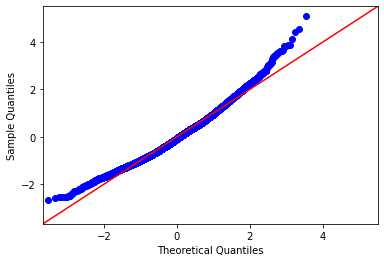

In [22]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True) #Setting QQ Plot

Looking good! Now let's see about that homoscedasticity.

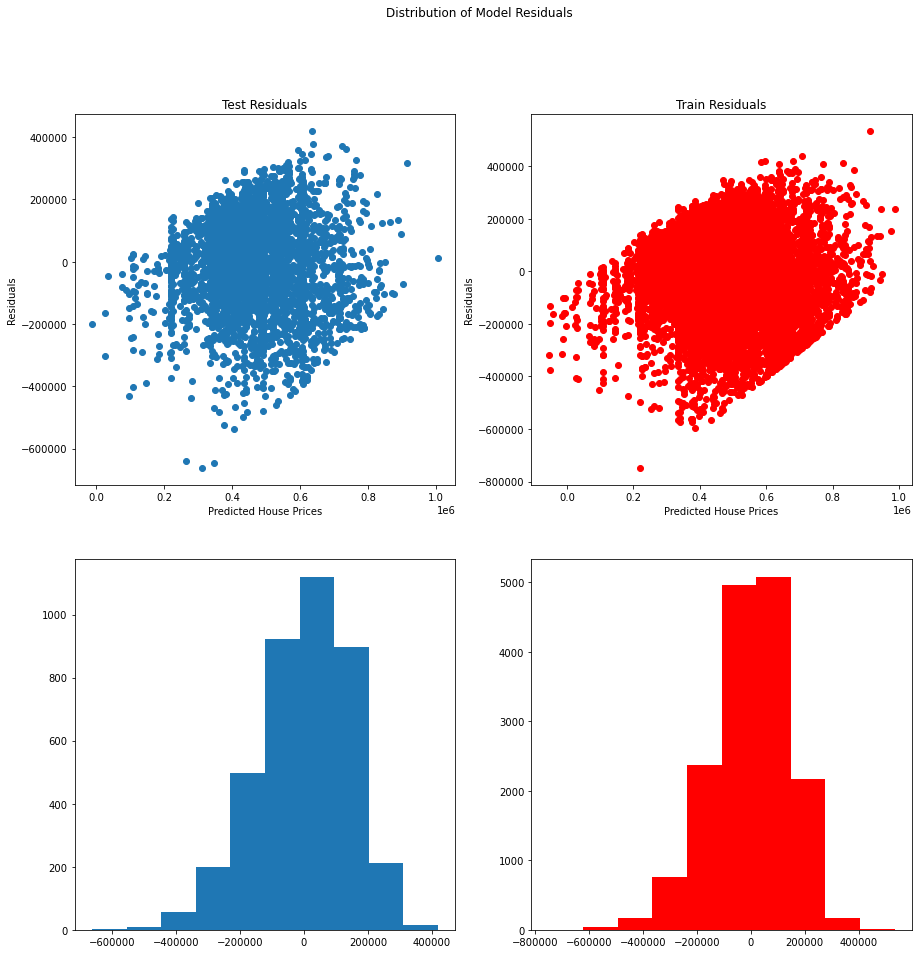

In [24]:
fig = plt.figure(figsize = (15, 15)) #Setting figure size
fig.suptitle('Distribution of Model Residuals') #Setting title of figure

ax1 = fig.add_subplot(2, 2, 1) #Creating scatterplot of test residuals
ax1.scatter(x = y_hat_test, y = Resid_Test) #Setting it to test residuals
ax1.set_title('Test Residuals') #Setting title of plot
ax1.set_xlabel('Predicted House Prices') #Setting X axis label
ax1.set_ylabel('Residuals') #Setting y axis label

ax2 = fig.add_subplot(2, 2, 2) #Creating scatterplot of train residuals
ax2.scatter(x = y_hat_train, y = Resid_Train, c = 'red') #Setting it to train residuals
ax2.set_title('Train Residuals') #Setting title of plot
ax2.set_xlabel('Predicted House Prices') #Setting X axis label
ax2.set_ylabel('Residuals') #Setting y axis label

ax3 = fig.add_subplot(2, 2, 3) #Creating histogram of test residuals
ax3.hist(Resid_Test) #Test residuals

ax4 = fig.add_subplot(2, 2, 4) #Creating histogram of train residuals
ax4.hist(Resid_Train, color = 'red'); #Train residuals

This is our final model!

# Conclusion

1. **Grade**

Grade, which we can think of as a house rating, has the biggest impact on price. When everything else is held constant, you can expect a price increase of about $112,000 per additional point.

2. **Floors**

The number of floors in the home can vastly change the price. When everything else is held constant, houses with 2.5 floors cost about $95,000 more than houses with 2.0 floors.

3. **Bathrooms**

The number of bathrooms the home has can also affect the house price. When everything else is held constant, for each additional bathroom the house has, you can expect a price increase of about $12,000.